In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import matplotlib.pyplot as plt
import numpy as np
import thinkdsp
from thinkdsp import read_wave

In [ ]:
audios = [None]*7
audios[0] = read_wave("caja.wav")
audios[1] = read_wave("guitarra.wav")
audios[2] = read_wave("palmadas.wav")
audios[3] = read_wave("estudio_grabacion.wav")
audios[4] = read_wave("plaza_che.wav")
audios[5] = read_wave("cathedral.wav")
audios[6] = read_wave("untitled.wav")

In [ ]:
while True:
    print("""Hay 3 opciones para tu audio de entrada.
    1. Un audio de caja.
    2. Un audio de guitarra.
    3. Unas palmadas.
    """)
    a = int(input(f"Ingresa el valor de el audio de entrada. (1, 2 o 3): "))
    print("""\nHay 3 opciones para tu impulso.
    1.Estudio de grabación
    2.Plaza che en la UN Bogotá
    3.Una catedral en Nueva York
    4.Precaution""")
    b = int(input(f"Ingresa el valor para la señal de impulso. (1, 2 , 3 o 4): "))
    if (a > 3 or b > 4) or (a < 1 or b < 1):
        print("\nOpciones invalidas, intenta de nuevo.\n")
    else:
        xn = audios[a-1]
        hn = audios[b+2]
        break

Hay 3 opciones para tu audio de entrada.
    1. Un audio de caja.
    2. Un audio de guitarra.
    3. Unas palmadas.
    
Ingresa el valor de el audio de entrada. (1, 2 o 3): 2

Hay 3 opciones para tu impulso.
    1.Estudio de grabación
    2.Plaza che en la UN Bogotá
    3.Una catedral en Nueva York
    4.Precaution
Ingresa el valor para la señal de impulso. (1, 2 , 3 o 4): 4


Audio frecuency: 16000 Hz. 
Audio duration: 5.0 s


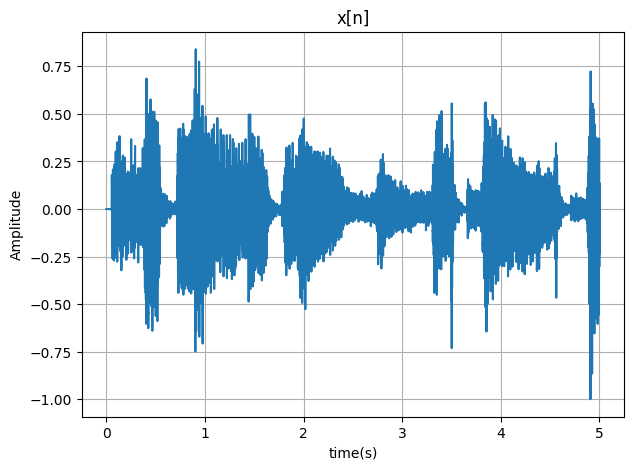

In [ ]:
#Señal de entrada y su gráfica de tiempo contra amplitud
fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlabel="time(s)", ylabel="Amplitude", title="x[n]")
ax.grid()
ax.plot(xn.ts, xn.ys)
print(f"Audio frecuency: {xn.framerate} Hz. \nAudio duration: {xn.duration} s")

In [ ]:
xn.make_audio()

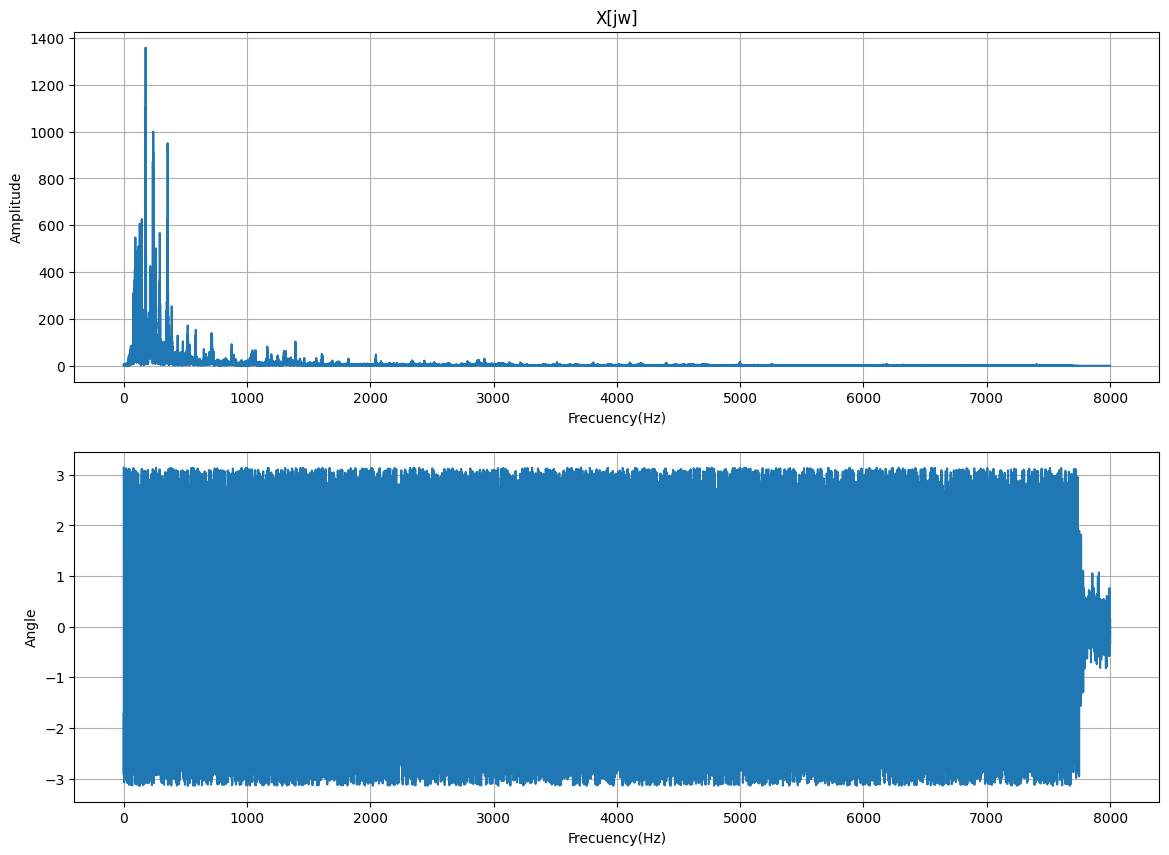

In [ ]:
#Epectro y ángulos de la señal de entrada x[n]
spectrum_xn = xn.make_spectrum()
fig, ax = plt.subplots(2 ,1, figsize=(14,10))
ax[0].set(xlabel="Frecuency(Hz)", ylabel="Amplitude", title="X[jw]")
ax[0].grid()
ax[0].plot(spectrum_xn.fs, np.abs(spectrum_xn.hs))

ax[1].plot(spectrum_xn.fs, np.angle(spectrum_xn.hs))
ax[1].set(xlabel="Frecuency(Hz)", ylabel="Angle")
ax[1].grid()

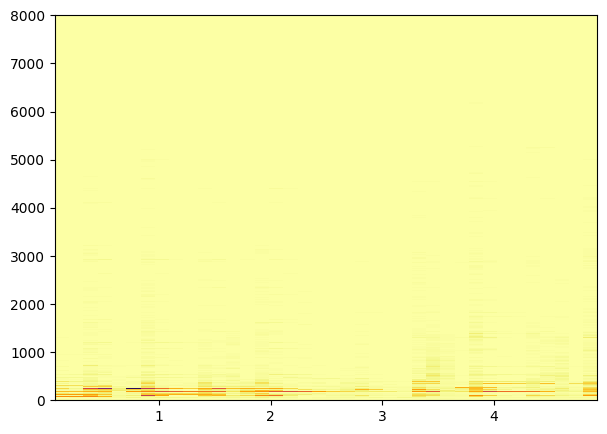

In [ ]:
#Espectrograma de la señal de entrada
xn_spectrogram = xn.make_spectrogram(seg_length=4096)
fig = plt.figure(figsize=(7,5))
xn_spectrogram.plot()

Audio frecuency: 16000 Hz. 
Audio duration: 4.368875 s


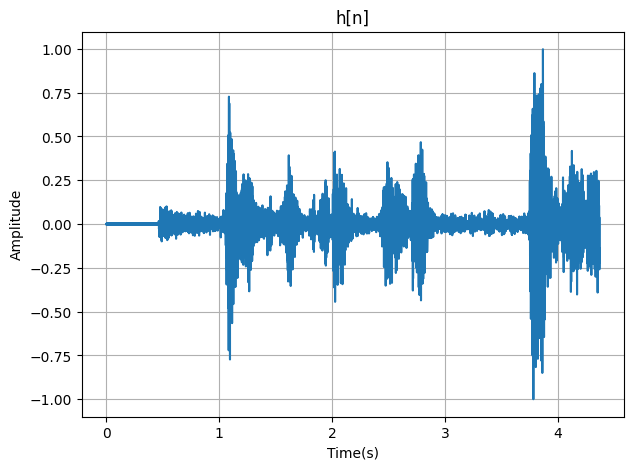

In [ ]:
#señal de respuesta de impulso
fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlabel="Time(s)", ylabel="Amplitude", title="h[n]")
ax.grid()
ax.plot(hn.ts, hn.ys)
print(f"Audio frecuency: {hn.framerate} Hz. \nAudio duration: {hn.duration} s")

In [ ]:
hn.make_audio()

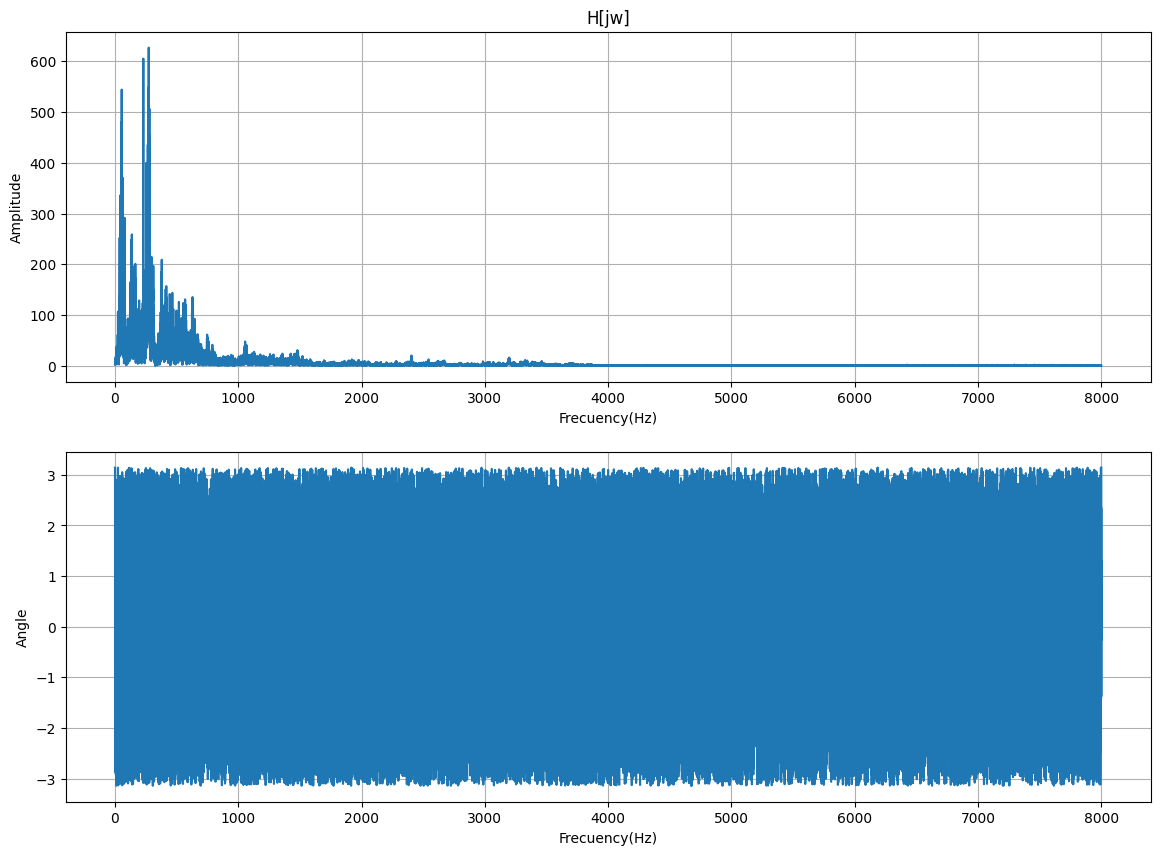

In [ ]:
#Esprectro de la respuesta al impulso
spectrum_hn = hn.make_spectrum()
fig, ax = plt.subplots(2 ,1, figsize=(14,10))
ax[0].set(xlabel="Frecuency(Hz)", ylabel="Amplitude", title="H[jw]")
ax[0].grid()
ax[0].plot(spectrum_hn.fs, np.abs(spectrum_hn.hs))

#print (spectrum_hn.hs)

ax[1].plot(spectrum_hn.fs, np.angle(spectrum_hn.hs))
ax[1].set(xlabel="Frecuency(Hz)", ylabel="Angle")
ax[1].grid()

In [ ]:
len(np.abs(spectrum_hn.hs))

16001

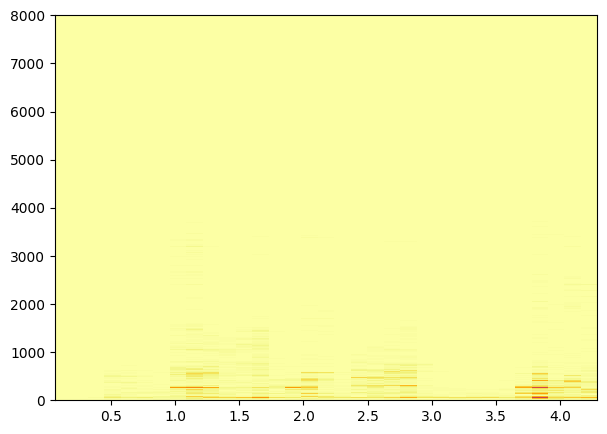

In [ ]:
#Espectrograma de la respuesta al impulso
hn_spectrogram = hn.make_spectrogram(seg_length=4096)
fig = plt.figure(figsize=(7,5))
hn_spectrogram.plot()
# plt.plot(hn.ts, spectrum_hn.hs)

Audio frecuency: 16000 Hz. 
Audio duration: 9.3688125 s


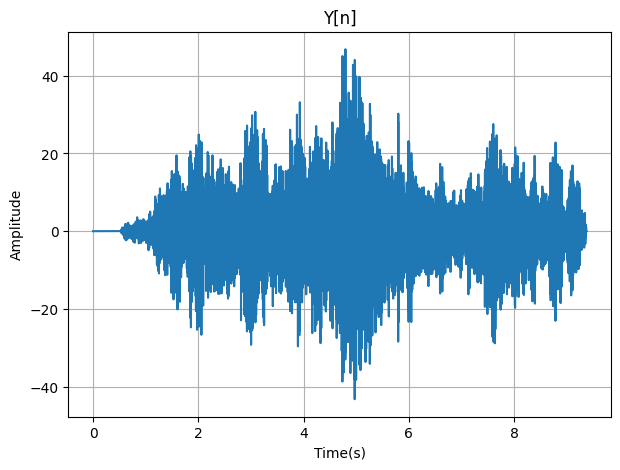

In [ ]:
#Convolución entre x[n] y h[n]
yn = xn.convolve(hn)
fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlabel="Time(s)", ylabel="Amplitude", title="Y[n]")
ax.grid()
ax.plot(yn.ts, yn.ys)
print(f"Audio frecuency: {yn.framerate} Hz. \nAudio duration: {yn.duration} s")

In [ ]:
yn.make_audio()

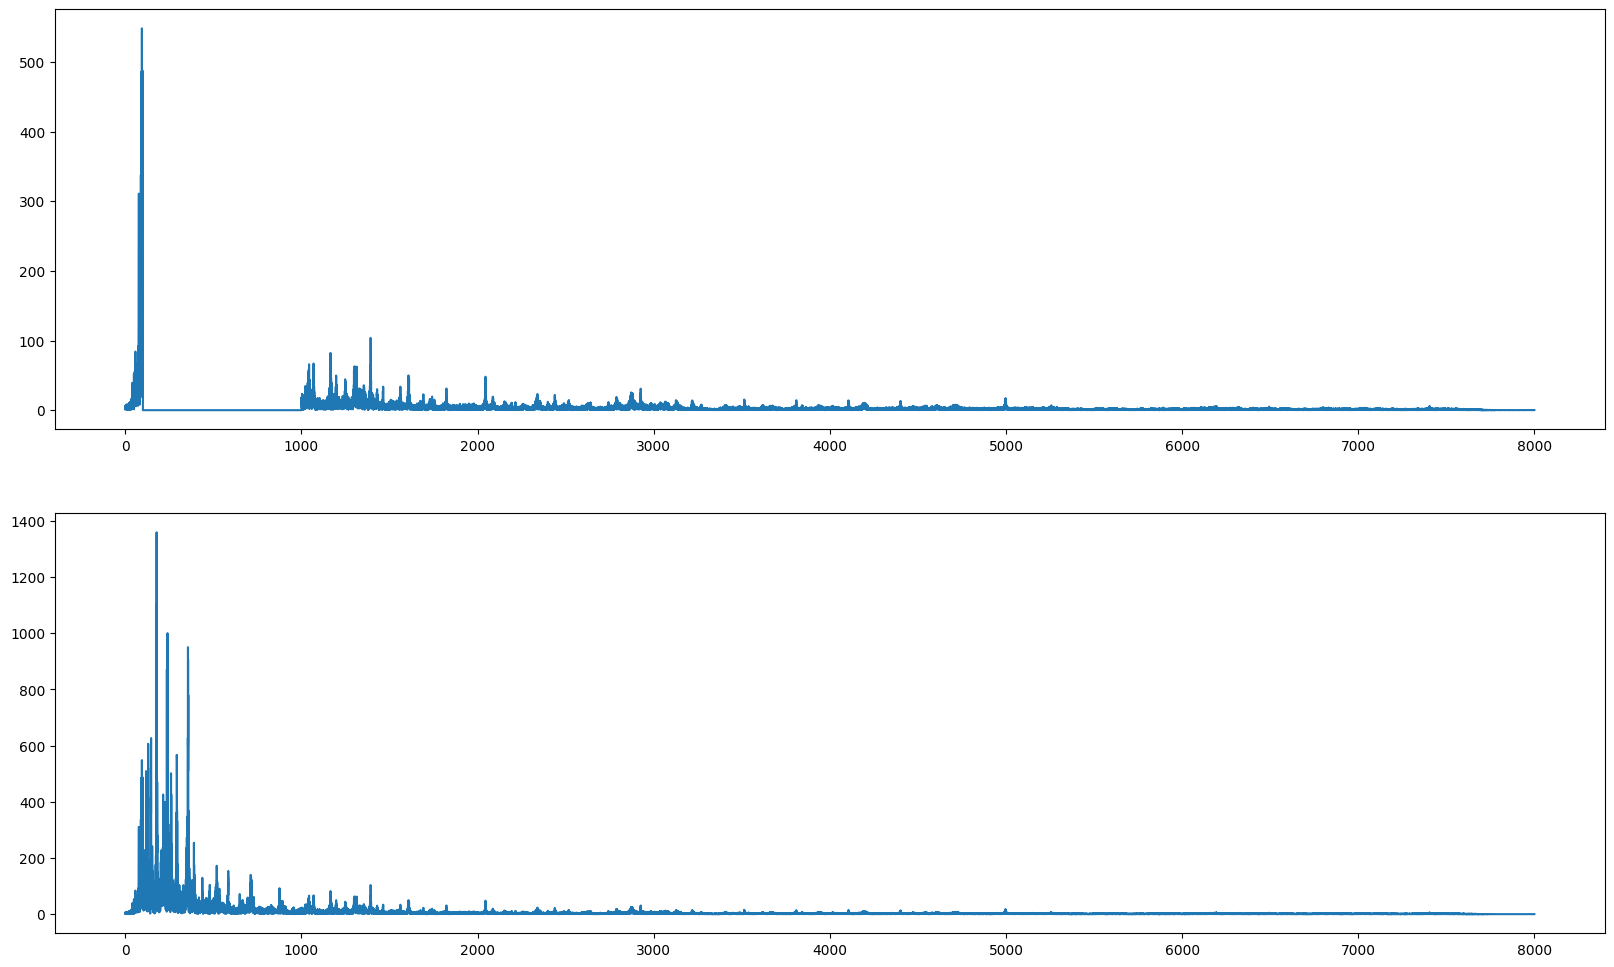

In [ ]:
#spectrum_xn.band_stop(100, 1000)
#spectrum_xn.band_stop(2000, 3000)
spectrum_xn = xn.make_spectrum()
fig, ax = plt.subplots(2,1,figsize=(20,12))
type(np.abs(spectrum_xn.hs))
s2=np.abs(spectrum_xn.hs)
s2[500:5000]=0
ax[0].plot(spectrum_xn.fs, s2)
ax[1].plot(spectrum_xn.fs, np.abs(spectrum_xn.hs))

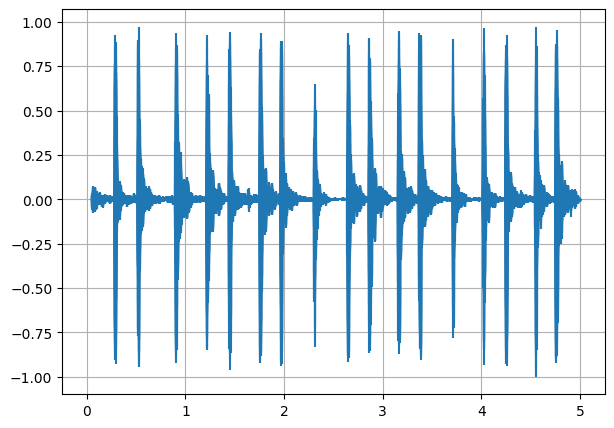

In [ ]:
xn.normalize(1.0)
fig, ax = plt.subplots(figsize=(7,5))
ax.grid()
#ax.plot(xn.ts, xn.ys)
xn.plot_vlines()

In [ ]:
xn.make_audio()

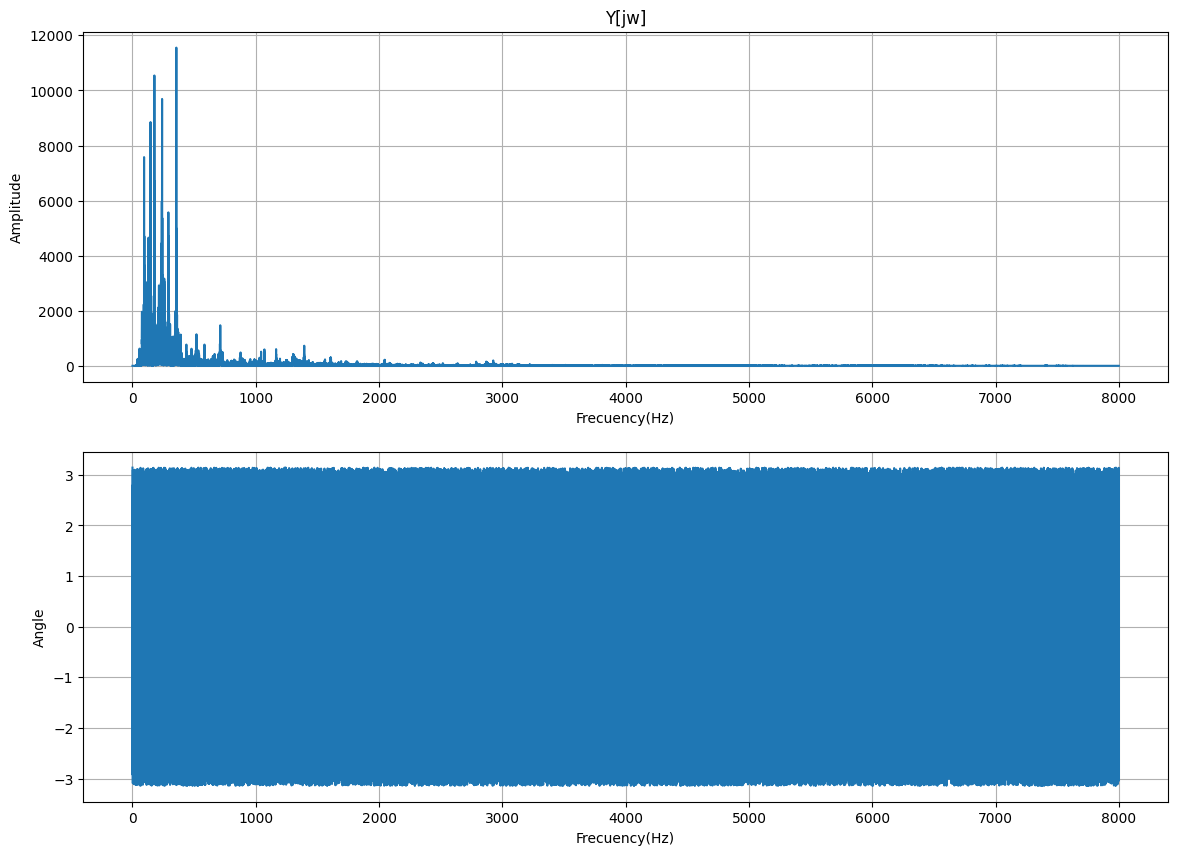

In [ ]:
#Espectro de la convolución entre x[n] y h[n]
spectrum_yn = yn.make_spectrum()
fig, ax = plt.subplots(2 ,1, figsize=(14,10))
ax[0].set(xlabel="Frecuency(Hz)", ylabel="Amplitude", title="Y[jw]")
ax[0].grid()
ax[0].plot(spectrum_yn.fs, np.abs(spectrum_yn.hs))

ax[1].plot(spectrum_yn.fs, np.angle(spectrum_yn.hs))
ax[1].set(xlabel="Frecuency(Hz)", ylabel="Angle")
ax[1].grid()
#fs, abs(hs)

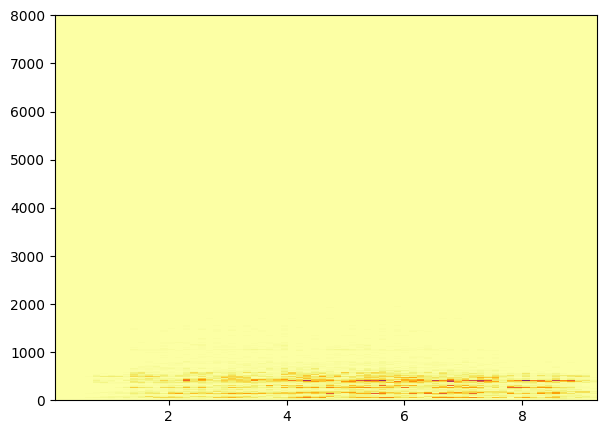

In [ ]:
#Espectrograma de la señal y[n]
yn_spectrogram = yn.make_spectrogram(seg_length=4096)
fig = plt.figure(figsize=(7,5))
yn_spectrogram.plot()

In [ ]:
yn.make_audio()

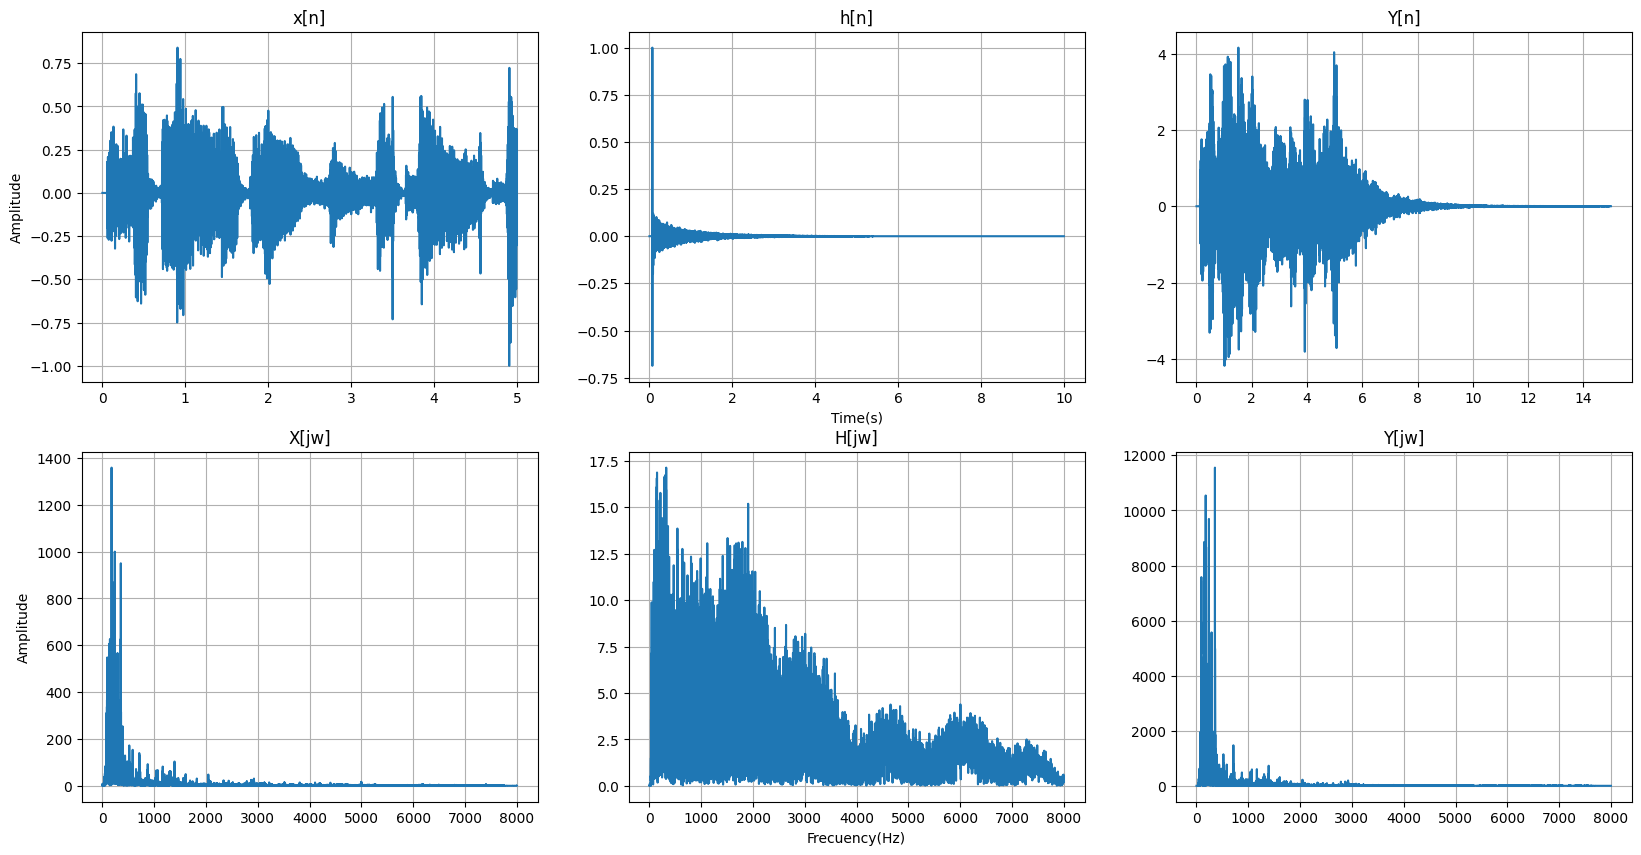

In [ ]:
#Resuen de las gráficas en el archivo

fig, axs = plt.subplots(2, 3, figsize=(20,10))
axs[0,0].plot(xn.ts, xn.ys)
axs[0,0].set(ylabel="Amplitude", title="x[n]")
axs[0,0].grid()

axs[0,1].set(xlabel="Time(s)", title="h[n]")
axs[0,1].grid()
axs[0,1].plot(hn.ts, hn.ys)

axs[0,2].plot(yn.ts, yn.ys)
axs[0,2].set(title="Y[n]")
axs[0,2].grid()

axs[1,0].set(ylabel="Amplitude", title="X[jw]")
axs[1,0].plot(spectrum_xn.fs, np.abs(spectrum_xn.hs))
axs[1,0].grid()

axs[1,1].set(xlabel="Frecuency(Hz)",title="H[jw]")
axs[1,1].plot(spectrum_hn.fs, np.abs(spectrum_hn.hs))
axs[1,1].grid()

axs[1,2].set(title="Y[jw]")
axs[1,2].plot(spectrum_yn.fs, np.abs(spectrum_yn.hs))
axs[1,2].grid()
